TASK 1 BIG DATA ANALYSIS 

In [1]:
# import SparkSession
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("BigDataAnalysis") \
    .getOrCreate()
#use dataset  
file_path = "C:/Users/sonak/Downloads/Bookings-100000-Rows.csv"
df = spark.read.csv(file_path, header=True, inferSchema=True)
print(df.show())

+-------------------+-------------------+-------------+--------------------+-----------+------------+-----------------+-------------+-----+-----+--------------------------+------------------------+----------------+-----------------------+-------------+--------------+-------------+--------------+---------------+--------------+
|               Date|               Time|   Booking_ID|      Booking_Status|Customer_ID|Vehicle_Type|  Pickup_Location|Drop_Location|V_TAT|C_TAT|Canceled_Rides_by_Customer|Canceled_Rides_by_Driver|Incomplete_Rides|Incomplete_Rides_Reason|Booking_Value|Payment_Method|Ride_Distance|Driver_Ratings|Customer_Rating|Vehicle Images|
+-------------------+-------------------+-------------+--------------------+-----------+------------+-----------------+-------------+-----+-----+--------------------------+------------------------+----------------+-----------------------+-------------+--------------+-------------+--------------+---------------+--------------+
|2024-07-26 14:0

In [3]:
#check columns
columns_to_check = [
    "Date", "Time", "Booking_ID", "Booking_Status", "Customer_ID",
    "Vehicle_Type", "Pickup_Location", "Drop_Location", "V_TAT", "C_TAT",
    "Canceled_Rides_by_Customer", "Canceled_Rides_by_Driver", "Incomplete_Rides",
    "Incomplete_Rides_Reason", "Booking_Value", "Payment_Method", "Ride_Distance",
    "Driver_Ratings", "Customer_Rating", "Vehicle Images"
]
df = df.dropna(subset=columns_to_check)
df = df.dropDuplicates()

In [4]:
from pyspark.sql.functions import to_date,col
df=df.withColumn("Booking_Date", to_date(col("Date"), "yyyy-MM-dd"))
# Convert numeric columns to float
numeric_cols = ["Booking_Value", "Ride_Distance", "Driver_Ratings", "Customer_Rating"]
for col_name in numeric_cols:
    df=df.withColumn(col_name, col(col_name).cast("float"))

1. Total Booking Value (Revenue)

In [5]:
df.selectExpr("sum(Booking_Value) as Total_Revenue").show()

+-------------+
|Total_Revenue|
+-------------+
|  5.6534614E7|
+-------------+



2. Average Driver Rating and Average Customer Rating

In [6]:
df.selectExpr("avg(Driver_Ratings) as Avg_Driver_Rating", "avg(Customer_Rating) as Avg_Customer_Rating").show()

+------------------+-------------------+
| Avg_Driver_Rating|Avg_Customer_Rating|
+------------------+-------------------+
|3.9974565002397813|  3.998313193677773|
+------------------+-------------------+



3. Top 10 Pickup Locations with Count

In [7]:
df.groupBy("Pickup_Location").count().orderBy("count", ascending=False).show(10)

+----------------+-----+
| Pickup_Location|count|
+----------------+-----+
|    Banashankari| 2201|
|    Yeshwanthpur| 2139|
|        RT Nagar| 2135|
|     Indiranagar| 2133|
|   Sahakar Nagar| 2126|
|    Basavanagudi| 2120|
|Ramamurthy Nagar| 2116|
|     Vijayanagar| 2113|
|     Tumkur Road| 2105|
|        Cox Town| 2100|
+----------------+-----+
only showing top 10 rows



4. Canceled rides by customer and driver

In [8]:
df.groupBy("Canceled_Rides_by_Customer", "Canceled_Rides_by_Driver").count().show()

+--------------------------+------------------------+-----+
|Canceled_Rides_by_Customer|Canceled_Rides_by_Driver|count|
+--------------------------+------------------------+-----+
|                      null|    Customer was coug...| 3654|
|           Change of plans|                    null| 2081|
|             Wrong Address|                    null| 1005|
|      Driver is not mov...|                    null| 3175|
|                      null|    Customer related ...| 5413|
|         AC is Not working|                    null| 1568|
|                      null|    More than permitt...| 2825|
|                      null|    Personal & Car re...| 6542|
|                      null|                    null|74091|
|      Driver asked to c...|                    null| 2670|
+--------------------------+------------------------+-----+



5. Reason for incomplete rides

In [9]:
df.groupBy("Incomplete_Rides_Reason").count().orderBy("count", ascending=False).show()

+-----------------------+-----+
|Incomplete_Rides_Reason|count|
+-----------------------+-----+
|                   null|99098|
|        Customer Demand| 1601|
|      Vehicle Breakdown| 1591|
|            Other Issue|  734|
+-----------------------+-----+



6. Vehicle Type

In [10]:
df.groupBy("Vehicle_Type").count().orderBy("count", ascending=False).show()

+------------+-----+
|Vehicle_Type|count|
+------------+-----+
| Prime Sedan|14877|
|       eBike|14816|
|        Auto|14755|
|  Prime Plus|14707|
|        Bike|14662|
|   Prime SUV|14655|
|        Mini|14552|
+------------+-----+



7. Add monthly and yearly booking count using PySpark

In [12]:
from pyspark.sql.functions import month, year
df = df.withColumn("Month", month(col("Booking_Date")))
df = df.withColumn("Year", year(col("Booking_Date")))
df.groupBy("Year", "Month").count().orderBy("Year", "Month").show()

+----+-----+------+
|Year|Month| count|
+----+-----+------+
|2024|    7|103024|
+----+-----+------+



Plots

Missing Pickup_Location: 0
Total rows before cleaning: 103024
Top Pickup Locations:
     Pickup_Location  Count
0      Banashankari   2201
1      Yeshwanthpur   2139
2          RT Nagar   2135
3       Indiranagar   2133
4     Sahakar Nagar   2126
5      Basavanagudi   2120
6  Ramamurthy Nagar   2116
7       Vijayanagar   2113
8       Tumkur Road   2105
9          Cox Town   2100


C:\Users\sonak\AppData\Local\Temp\ipykernel_100\4254307747.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_pickup, x="Count", y="Pickup_Location", palette="viridis")


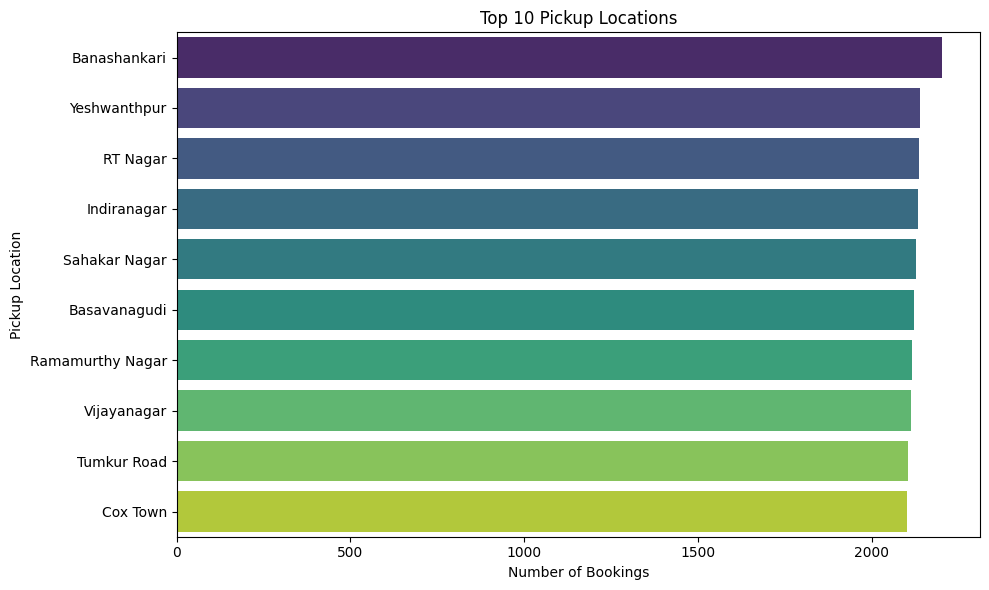

In [2]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display plots 
%matplotlib inline

# Step 2: Load the dataset
df_raw = pd.read_csv("C:/Users/sonak/Downloads/Bookings-100000-Rows.csv")

# Step 3: Check how many missing values are in Pickup_Location
print("Missing Pickup_Location:", df_raw["Pickup_Location"].isna().sum())
print("Total rows before cleaning:", df_raw.shape[0])

# Step 4: Only drop rows where Pickup_Location is missing (gentle cleaning)
df = df_raw.dropna(subset=["Pickup_Location"]).copy()

# clean whitespace in text columns
df["Pickup_Location"] = df["Pickup_Location"].astype(str).str.strip()

# Step 5: Basic preprocessing (convert Date to datetime)
df["Date"] = pd.to_datetime(df["Date"], errors='coerce')
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month

# Step 6: Value counts for top pickup locations
top_pickup = df["Pickup_Location"].value_counts().nlargest(10).reset_index()
top_pickup.columns = ["Pickup_Location", "Count"]

print("Top Pickup Locations:\n", top_pickup)

# Step 7: Plot Top 10 Pickup Locations
plt.figure(figsize=(10, 6))
sns.barplot(data=top_pickup, x="Count", y="Pickup_Location", palette="viridis")
plt.title("Top 10 Pickup Locations")
plt.xlabel("Number of Bookings")
plt.ylabel("Pickup Location")
plt.tight_layout()
plt.show()


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Load dataset
df_raw = pd.read_csv("C:/Users/sonak/Downloads/Bookings-100000-Rows.csv")
df = df_raw.dropna(subset=["Pickup_Location"]).copy()
df["Pickup_Location"] = df["Pickup_Location"].astype(str).str.strip()
df["Drop_Location"] = df["Drop_Location"].astype(str).str.strip()
df["Date"] = pd.to_datetime(df["Date"], errors='coerce')
df["Month"] = df["Date"].dt.to_period("M")

Monthly Ride Volume

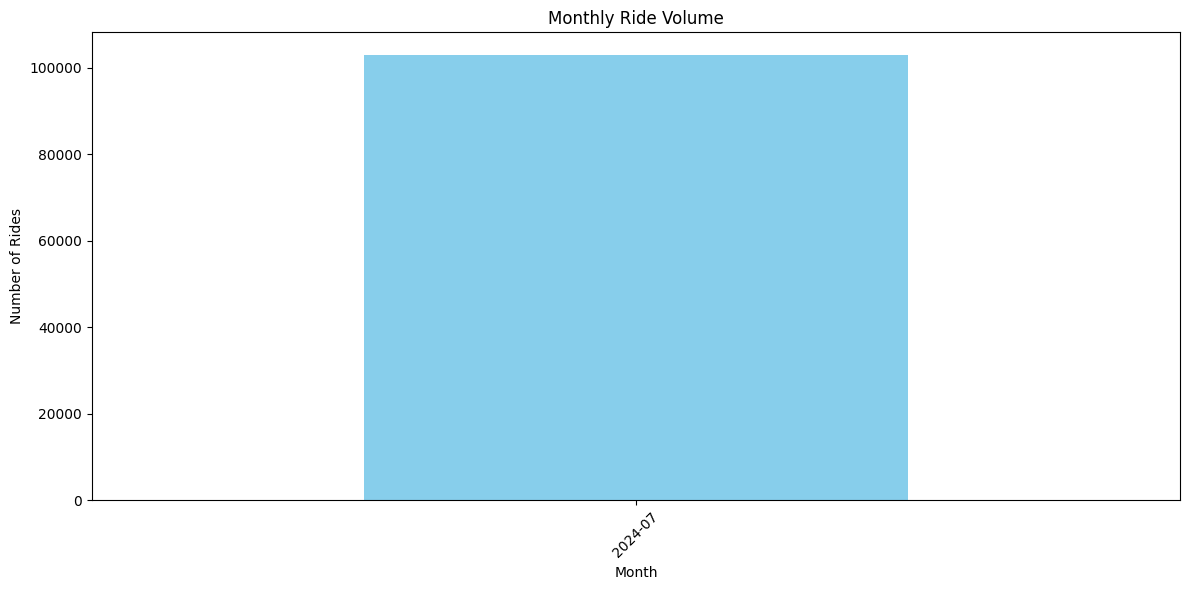

In [4]:
monthly_counts = df["Month"].value_counts().sort_index()
plt.figure(figsize=(12, 6))
monthly_counts.plot(kind="bar", color="skyblue")
plt.title("Monthly Ride Volume")
plt.xlabel("Month")
plt.ylabel("Number of Rides")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Average Booking Value by Payment Method

C:\Users\sonak\AppData\Local\Temp\ipykernel_100\118305075.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_booking.values, y=avg_booking.index, palette="Blues_d")


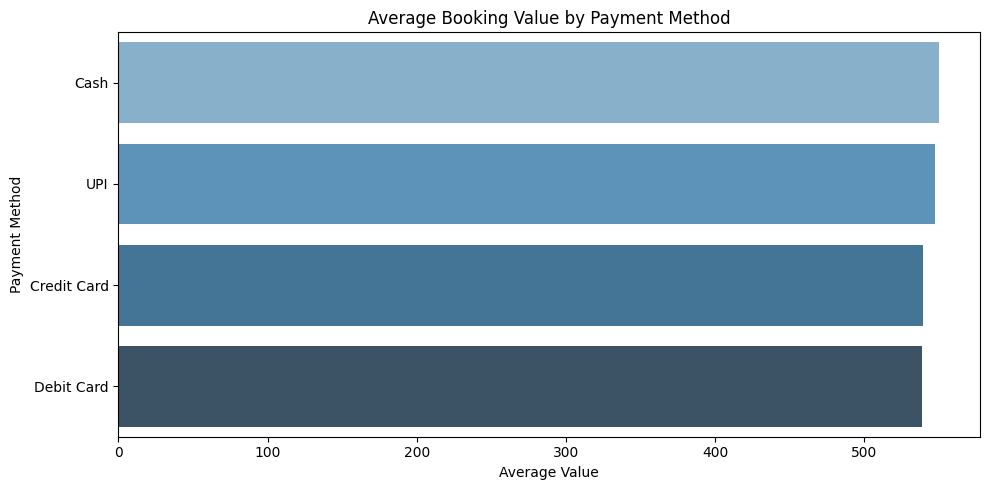

In [5]:
df["Booking_Value"] = pd.to_numeric(df["Booking_Value"], errors='coerce')
avg_booking = df.groupby("Payment_Method")["Booking_Value"].mean().dropna().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_booking.values, y=avg_booking.index, palette="Blues_d")
plt.title("Average Booking Value by Payment Method")
plt.xlabel("Average Value")
plt.ylabel("Payment Method")
plt.tight_layout()
plt.show()

Top 10 Drop Locations

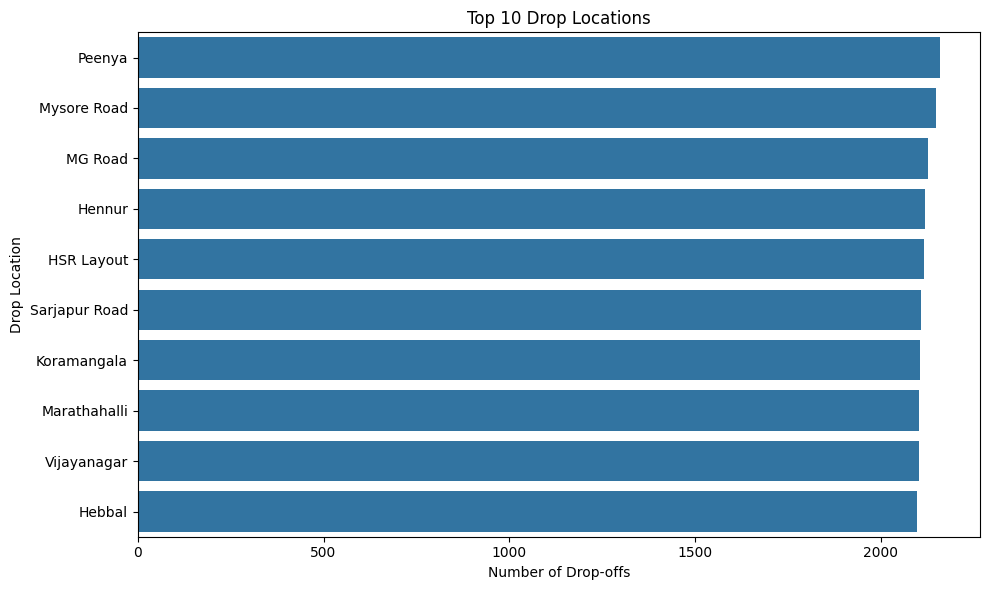

In [6]:
top_drop = df["Drop_Location"].value_counts().nlargest(10).reset_index()
top_drop.columns = ["Drop_Location", "Count"]
plt.figure(figsize=(10, 6))
sns.barplot(data=top_drop, x="Count", y="Drop_Location")
plt.title("Top 10 Drop Locations")
plt.xlabel("Number of Drop-offs")
plt.ylabel("Drop Location")
plt.tight_layout()
plt.show()

Average Driver Rating by Vehicle Type 

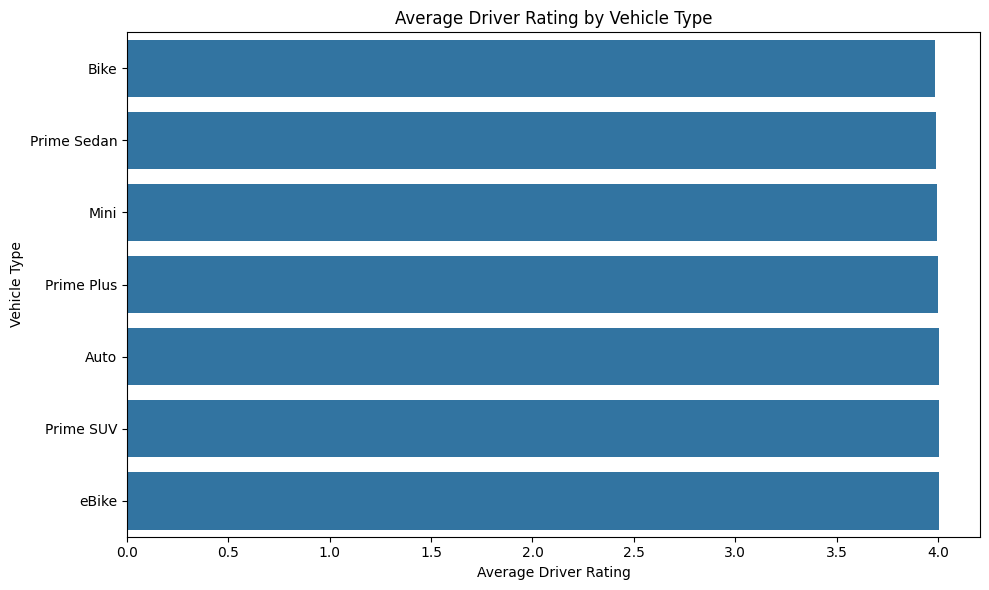

In [7]:
df["Driver_Ratings"] = pd.to_numeric(df["Driver_Ratings"], errors='coerce')
driver_rating = df.groupby("Vehicle_Type")["Driver_Ratings"].mean().dropna().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=driver_rating.values, y=driver_rating.index)
plt.title("Average Driver Rating by Vehicle Type")
plt.xlabel("Average Driver Rating")
plt.ylabel("Vehicle Type")
plt.tight_layout()
plt.show()